<a href="https://colab.research.google.com/github/SamuelRuby/Kidney-Stones-and-Simpson-s-Paradox/blob/main/Kidney_stones_and_Simpson's_paradox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set was imported from 

https://www.kaggle.com/datasets/utkarshxy/kidney-stone-data?resource=download&select=kidney_stone_data.csv

In [ ]:
#to load R in a python environment . google colab in this case
%load_ext rpy2.ipython

In [3]:
#importing tidyverse package
%%R
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
#testruning to ensure that my package is installed
%%R
mpg

# A tibble: 234 × 11
   manufacturer model      displ  year   cyl trans drv     cty   hwy fl    class
   <chr>        <chr>      <dbl> <int> <int> <chr> <chr> <int> <int> <chr> <chr>
 1 audi         a4           1.8  1999     4 auto… f        18    29 p     comp…
 2 audi         a4           1.8  1999     4 manu… f        21    29 p     comp…
 3 audi         a4           2    2008     4 manu… f        20    31 p     comp…
 4 audi         a4           2    2008     4 auto… f        21    30 p     comp…
 5 audi         a4           2.8  1999     6 auto… f        16    26 p     comp…
 6 audi         a4           2.8  1999     6 manu… f        18    26 p     comp…
 7 audi         a4           3.1  2008     6 auto… f        18    27 p     comp…
 8 audi         a4 quattro   1.8  1999     4 manu… 4        18    26 p     comp…
 9 audi         a4 quattro   1.8  1999     4 auto… 4        16    25 p     comp…
10 audi         a4 quattro   2    2008     4 manu… 4        20    28 p     comp…
# … wit

In [32]:
%%R
# Load the readr and dplyr packages
library(readr)
library(dplyr)

data <- read_csv("/content/sample_data/kidney_stone_data.csv")
# Take a look at the first few rows of the dataset
head(data)

Rows: 700 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): treatment, stone_size
dbl (1): success

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 3
  treatment stone_size success
  <chr>     <chr>        <dbl>
1 B         large            1
2 A         large            1
3 A         large            0
4 A         large            1
5 A         large            1
6 B         large            1


The data contains three columns: treatment (A or B), stone_size (large or small) and success (0 = Failure or 1 = Success). To start, we want to know which treatment had a higher success rate regardless of stone size. We'll create a table with the number of successes and frequency of success by each treatment using the tidyverse syntax.

In [33]:
%%R
# Calculate the number and frequency of success and failure of each treatment
data %>% 
  group_by(treatment, success) %>%
  summarise(N = n()) %>%
  mutate(Freq = round(N/sum(N),3))

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.
# A tibble: 4 × 4
# Groups:   treatment [2]
  treatment success     N  Freq
  <chr>       <dbl> <int> <dbl>
1 A               0    77 0.22 
2 A               1   273 0.78 
3 B               0    61 0.174
4 B               1   289 0.826






From the treatment and success rate descriptive table, we saw that treatment B performed better on average compared to treatment A (82% vs. 78% success rate). 

Now, we'll consider stone size and see what happens. I am going to stratify the data into small vs. large stone subcategories and compute the same success count and rate by treatment like I did in the previous task.

The final table will be treatment X stone size X success.

In [34]:
%%R
# Calculate number and frequency of success and failure by stone size for each treatment
sum_data <- 
  data %>% 
  group_by(treatment, stone_size, success) %>%
  summarise(N = n()) %>%
  mutate(Freq = round(N/sum(N),3))

# Print out the data frame we just created
sum_data

`summarise()` has grouped output by 'treatment', 'stone_size'. You can override
using the `.groups` argument.
# A tibble: 8 × 5
# Groups:   treatment, stone_size [4]
  treatment stone_size success     N  Freq
  <chr>     <chr>        <dbl> <int> <dbl>
1 A         large            0    71 0.27 
2 A         large            1   192 0.73 
3 A         small            0     6 0.069
4 A         small            1    81 0.931
5 B         large            0    25 0.312
6 B         large            1    55 0.688
7 B         small            0    36 0.133
8 B         small            1   234 0.867






When stratified by stone size, treatment A had better results for both large and small stones compared to treatment B (i.e., 73% and 93% v.s. 69% and 87%). Sometimes a plot is a more efficient way to communicate hidden numerical information in the data. I am going to apply a plotting technique to reveal the hidden information.

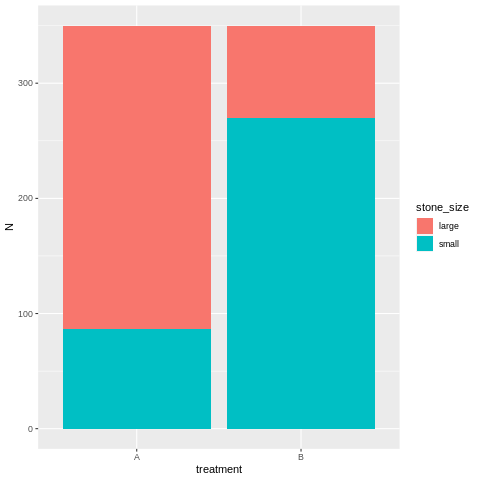

In [35]:
%%R
# Load ggplot2
library(ggplot2)

# Create a bar plot to show stone size count within each treatment
sum_data %>%
  ggplot(aes(x = treatment, y = N)) + 
  geom_bar(aes(fill = stone_size), stat = "identity") 

From the bar plot, we noticed an unbalanced distribution of kidney stone sizes in the two treatment options. Large kidney stone cases tended to be in treatment A, while small kidney stone cases tended to be in treatment B. Can we confirm this hypothesis with statistical testing?


Let's analyze the association between stone size (i.e., case severity) and treatment assignment using a statistical test called Chi-squared. The Chi-squared test is appropriate to test associations between two categorical variables. This test result, together with the common knowledge that a more severe case would be more likely to fail regardless of treatment, will shed light on the root cause of the paradox.

In [36]:
%%R
# Load the broom package 
library(broom)

# Run a Chi-squared test
trt_ss <- chisq.test(data$treatment, data$stone_size)

# Print out the result in tidy format 
tidy(trt_ss)

# A tibble: 1 × 4
  statistic  p.value parameter method                                           
      <dbl>    <dbl>     <int> <chr>                                            
1      189. 4.40e-43         1 Pearson's Chi-squared test with Yates' continuit…



From the above observations, we are confident that stone size/case severity is indeed the lurking variable (aka, confounding variable) in this study of kidney stone treatment and success rate. The good news is that there are ways to get rid of the effect of the lurking variable.

Let's practice using multiple logistic regression to remove the unwanted effect of stone size, and then tidy the output with a function from the broom package.

In [37]:
%%R
# Run a multiple logistic regression
m <- glm(data = data, success ~ stone_size + treatment, family = 'binomial')

# Print out model coefficient table in tidy format
tidy(m)

# A tibble: 3 × 5
  term            estimate std.error statistic  p.value
  <chr>              <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)        1.03      0.134      7.68 1.55e-14
2 stone_sizesmall    1.26      0.239      5.27 1.33e- 7
3 treatmentB        -0.357     0.229     -1.56 1.19e- 1


We have successfully fit a multiple logistic regression and pulled out the model coefficient estimates! Typically (and arbitrarily), P-values below 0.05 indicate statistical significance. Another way to examine whether a significant relationship exists or not is to look at the 95% confidence interval (CI) of the estimate. In our example, we are testing to see:

- if the effect of a small stone is the same as a big stone, and
- if treatment A is as effective as treatment B.


If the 95% CI for the coefficient estimates cover zero, we cannot conclude that one is different from the other. Otherwise, there is a significant effect.

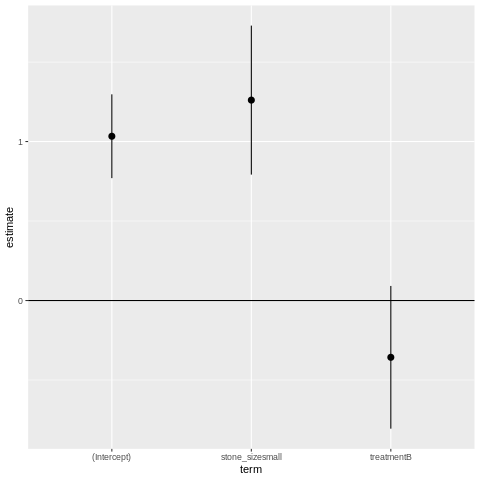

In [38]:
%%R
# Save the tidy model output into an object
tidy_m <- tidy(m)

# Plot the coefficient estimates with 95% CI for each term in the model
tidy_m %>%
  ggplot(aes(x=term, y=estimate)) + 
  geom_pointrange(aes(ymin=estimate-1.96*std.error, 
                      ymax=estimate+1.96*std.error)) +
  geom_hline(yintercept = 0)

**Conclusion:**

Based on the coefficient estimate plot and the model output table, there is enough information to generate insights about the study. Is treatment A superior to B after taking into account the effect of stone size/severity level?

Everything is in the output table from the regression model. Recall, a coefficient represents the effect size of the specific model term. A positive coefficient means that the term is positively related to the outcome. For categorical predictors, the coefficient is the effect on the outcome relative to the reference category. In our study, stone size large and treatment A are the reference categories.

In [39]:
%%R
# Is small stone more likely to be a success after controlling for treatment option effect?
# Options: Yes, No (as string)
small_high_success <- "Yes"

# Is treatment A significantly better than B?
# Options: Yes, No (as string)
A_B_sig <- "No"

Stay tuned for another coding session where I use Machine learning to train on this dataset.